# Battle of the Neighborhoods : Singapore - Economic Neighborhoods Vs Popular Venues
### 1. Collection and Cleaning of data

In [1]:
#import libraries
import pandas as pd
import numpy as np
from IPython.display import HTML
import base64
import requests # library to handle requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
print ('libraries importing - Done Sir!')

libraries importing - Done Sir!


##### The first set of data for this analysis is the file 'resale-flat-prices-jan-2017-onwards.csv' from the Housing Development Board of Singapore. 
This file is available from 'https://data.gov.sg', which is the authentic source and storage from Singapore Goverment which provides data for Public usage.

In [2]:
#lets make a pandas dataframe from the resale-flatprice csv file
df_raw= pd.read_csv('https://raw.githubusercontent.com/abhi-divakaran/Coursera_Capstone/master/FINAL/resale-flat-prices-jan-2017-onwards.csv')
df_raw.head(5)
#derived from data published by data.gov.sg (https://data.gov.sg) under the terms of the Singapore Open Data License version 1.0 (https://data.gov.sg/open-data-licence).

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:

# alternatively may get the data file from the source

# # Extra Helper scripts to generate download links for saved dataframes in csv format.
# def create_dlink( df, title = "Download CSV file", filename = "data.csv"):  
#     csv = df.to_csv()
#     b64 = base64.b64encode(csv.encode())
#     payload = b64.decode()
#     html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
#     html = html.format(payload=payload,title=title,filename=filename)
#     return HTML(html)

# !wget -q -O 'resale-flat-prices.zip' "https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee/download"
# zf = zipfile.ZipFile('/resale-flat-prices.zip')
# df_sghdb = pd.read_csv(zf.open("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"))


In [4]:
#Lets check the shape of this data
df_raw.shape

(56335, 11)

##### This data has 56,335 records of data with 11 features in a span of 3 years. Lets do some Feature optimization.  
The first feature is 'month'. This is the range of time for the rcords collected.  
It starts from 2017 January.  
We need data only for the years 2018 and 2019. Hence lets drop all other records.

In [5]:
#we select the data from year 2018 and 2019 so that we get a better saturated price
df_feature1=df_raw[df_raw['month'].str.contains('2018|2019')].reset_index(drop=True)
df_feature1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2018-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0
1,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,58 years 04 months,300000.0
2,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,58 years 04 months,328000.0
3,2018-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,10 TO 12,68.0,New Generation,1981,62 years,300000.0
4,2018-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,62 years,273000.0


In [6]:
# lets check the count of data
df_feature1.shape

(35985, 11)

##### The data set has now reduced to 35,985 records.  
Second feature is 'town' which indicates the name of the towns for each record, hence no correction needed.  
3rd feature is 'flat_type' which indicates a class based on number of rooms in a house.  
Our analysis is to find the mean housing price of a town.  
Certain flat types are way expensive though they are low in numbers.  
This scenario will reduce the accuracy of values. As such we only need to consider the most common type of flats.  
##### To proceed lets find out which is the most common flat type.

In [7]:
# HDB flats has few layout based on number of rooms - let see the list 
print('Type of Flats:\n', df_feature1['flat_type'].unique())
print('Number of Flat-Types in the dataset: ', df_feature1['flat_type'].nunique())

Type of Flats:
 ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
Number of Flat-Types in the dataset:  7


Text(0.5, 1.0, 'Most popular Flat types by Number of transactions')

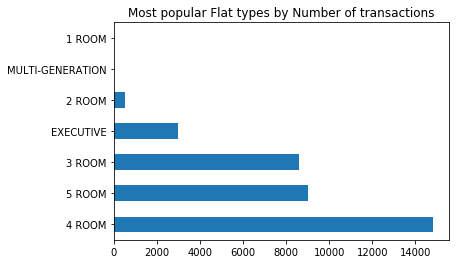

In [8]:
#lets see which flat type is the most common
pd.value_counts(df_feature1['flat_type']).plot.barh()
plt.title('Most popular Flat types by Number of transactions')

##### Obviously 4 Room flats are the most common flat type in Singapore.  
A 4 Room flat typically contains 3 Bed rooms and 1 Living room.  
We choose 3 Room, 4 Room and 5 Room flats as the flat type for our study.  
##### Lets drop all other

In [9]:
df_feature3=df_feature1[df_feature1['flat_type'].str.contains('3 ROOM|4 ROOM|5 ROOM').reset_index(drop=True)]
df_feature3.shape

(32437, 11)

##### Feature 4 and 5 are the address of the enity hence no correction needed.  
##### Feature 6, 'storey_range' is a classification based on what level of the building is the flat located.  
This class has a minor effect in the flat pricing.  
For example, a flat in 9th floor might cost an additional 10 thousand than a flat in the 3rd floor.  
However as we average out the prices by group and town, this becomes ignorable.  
##### 7th feature has no impact as this match very close to the flat types.  
##### Feature number 8, flat_model definitly has some impact on the result.  
certain models are too less in numbers, but costs as much as 3 times higher than another model with same flat type or floor area.  
Here we have to find the standard models and choose only them for the study.  
lets dig further here

In [10]:
# HDB flats models indicates certain design fashions. lets find the models 
print('Model of Flats:\n', df_feature3['flat_model'].unique())
print('Number of Flat-Models in the dataset: ', df_feature3['flat_model'].nunique())

Model of Flats:
 ['New Generation' 'Model A' 'Improved' 'DBSS' 'Simplified'
 'Premium Apartment' 'Standard' 'Model A2' 'Type S1' 'Type S2'
 'Adjoined flat' 'Terrace' 'Model A-Maisonette' 'Improved-Maisonette'
 'Premium Apartment.' 'Premium Apartment Loft']
Number of Flat-Models in the dataset:  16


In [11]:
# we have a duplicate here 'Premium Apartment' and 'Premium Apartment.'. Just merge the latter to the former
df_feature3['flat_model']=df_feature3['flat_model'].str.replace('Premium Apartment.', 'Premium Apartment')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Most Common Flat Models by number of transaction')

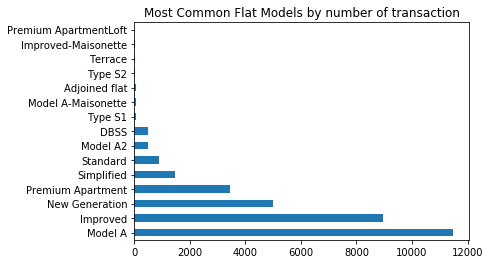

In [12]:
#lets see which flat model is the most prominent
pd.value_counts(df_feature3['flat_model']).plot.barh()
plt.title('Most Common Flat Models by number of transaction')

##### From the plot, its clear that 'Model A' is the most common model, followed by 'Improved;, 'New generation' and 'Premium Apartment'.  
But price wise that may be different, lets plot it and confirm.

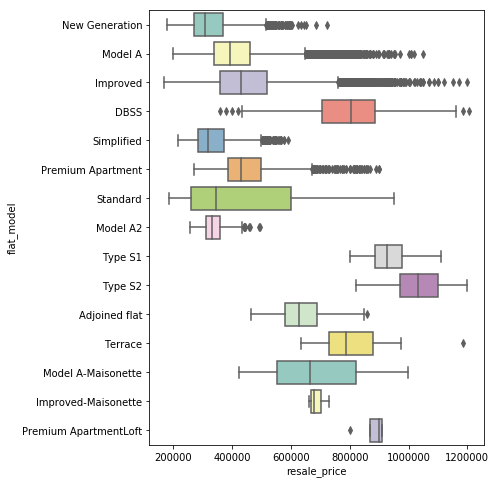

In [13]:
plt.figure(figsize=(6,8))
sns.boxplot(
    data=df_feature3,
    x='resale_price',
    y='flat_model',
    palette='Set3'
    )

We can see here, the **7 models in bottom of the chart** and **Model DBSS** belongs to expensive category and they are not popular.  
Model A2, Standard and Simplified are considerable but we leave them for now.
Considering this models in our modelling may lead to data inaccuracy.  
So lets drop all these models.  


In [14]:
df_feature8_raw=df_feature3[df_feature3['flat_model'].str.contains('Model A|Improved|New Generation|Premium Apartment')]
df_feature8=df_feature8_raw[~df_feature8_raw['flat_model'].str.contains('A2|Maisonette|Loft')]
df_feature8.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
1,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,58 years 04 months,300000.0
2,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,58 years 04 months,328000.0
3,2018-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,10 TO 12,68.0,New Generation,1981,62 years,300000.0
4,2018-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,62 years,273000.0
5,2018-01,ANG MO KIO,3 ROOM,405,ANG MO KIO AVE 10,07 TO 09,82.0,New Generation,1979,60 years 05 months,330000.0


In [15]:
#Lets verify 
df_feature8['flat_model'].unique()

array(['New Generation', 'Model A', 'Improved', 'Premium Apartment'],
      dtype=object)

##### The next two features are pertaining to a single reference.  
In Singapore when an HDB flat is bought, the transaction is not really a sale - its a lease of 99 years.  
That means the buyer owns the property for 99 years.  
The government has set the dwellable life of a flat as 99 years.  
Once the age of the flat reaches 35 years, the maximum loan amount a bank can provide falls to 65% from the original 85%.  
This turns away most of the buyers.  
Hence there is price drop for old flats.  
Certain towns in Singapore are considered as old towns and a large number flats there might be older ones.  
**Considering this we will segregate the flats older than 35 years out and choose the remaining for our study.**

In [16]:
# for a clear picture we add a new column as 'Age' which tells the age of the flat starting from the 'lease_commence_date'
df_feature8['Age']= (2019)-df_feature8['lease_commence_date']
df_feature8.head(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Age
1,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,58 years 04 months,300000.0,42
2,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,58 years 04 months,328000.0,42


##### As we have the new feature "Age", let's drop all records with the age of flat more than 35 year.

In [17]:
df_feature10=df_feature8.drop(df_feature8.loc[df_feature8['Age']>35].index)
df_feature10.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Age
9,2018-01,ANG MO KIO,3 ROOM,466,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1984,65 years 08 months,255000.0,35
16,2018-01,ANG MO KIO,3 ROOM,473,ANG MO KIO AVE 10,07 TO 09,67.0,New Generation,1984,65 years 06 months,328000.0,35


In [18]:
#Lets check the number of records now
df_feature10.shape[0]

22503

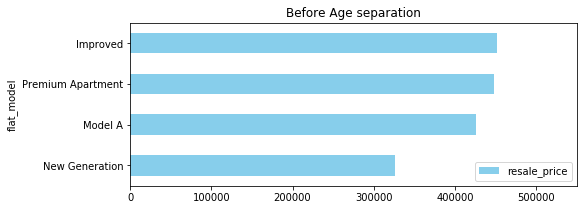

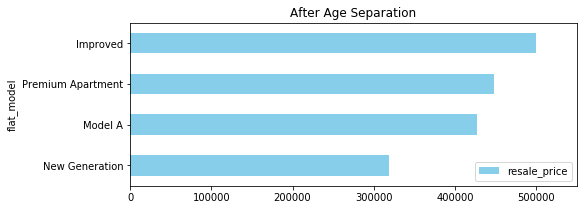

In [19]:
# we do a quick plot of 'before and after age separation', so that to see if there a meaningful result after segregation.
df_model_8 = (df_feature8.groupby('flat_model')['resale_price'].mean().astype(int)).reset_index()
df_model_8sort=df_model_8.sort_values(by=['resale_price']).reset_index(drop=True)
#plot
ax1= df_model_8sort.plot.barh(x='flat_model', y='resale_price', rot=0, figsize=(8, 3), color='skyblue' )
ax1.set_xlim([0,550000])
ax1.title.set_text('Before Age separation')
# we do a quick plot before proceeding to age separation, so that to see if there a meaningful result after segregation.
df_model_10 = (df_feature10.groupby('flat_model')['resale_price'].mean().astype(int)).reset_index()
df_model_10sort=df_model_10.sort_values(by=['resale_price']).reset_index(drop=True)
#plot
ax2= df_model_10sort.plot.barh(x='flat_model', y='resale_price', rot=0, figsize=(8, 3), color='skyblue' )
ax2.set_xlim([0,550000])
ax2.title.set_text('After Age Separation')

This two charts shows the difference in the mean price of the flats, by flat-model, before and after the feature cleaning.  
The optimization is clear in the second chart

In [20]:
# Singapore has 26 town; lets check we have data for all the towns 
print('Name of the towns:\n', df_feature10['town'].unique())
print('Number of towns in the dataset: ', df_feature10['town'].nunique())

Name of the towns:
 ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'PASIR RIS'
 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON' 'TAMPINES'
 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
Number of towns in the dataset:  25


Singapore has in fact 26 towns. Our original dataset as well have data from 26 towns.  
But Marine Parade Town is not really a residential area with any subsidized housing.  
The HDB flats there are mostly very old and categorized as conservative.  
Its a prime area for private housing projects.  
Therefore records from Marine Parade will be naturally dropped by our earlier data cleaning.  
##### So that our raw data is clean now, we can extract our label and the target out of the data.
Lets pick town names and consolidate the flat price to each, by the mean value of flat price

In [21]:
# step one - extract out 'town' and 'resale_price' to a new dataframe.
df_priceplot=df_feature10.loc[0:,['town', 'resale_price']]
df_priceplot.head()

,town,resale_price
9,ANG MO KIO,255000.0
16,ANG MO KIO,328000.0
34,ANG MO KIO,340000.0
35,ANG MO KIO,635000.0
42,ANG MO KIO,448000.0


##### Before we proceed to average out the price, lets have a look at the price distribution

Text(0.0, 1.0, 'Boxplot with jitter')

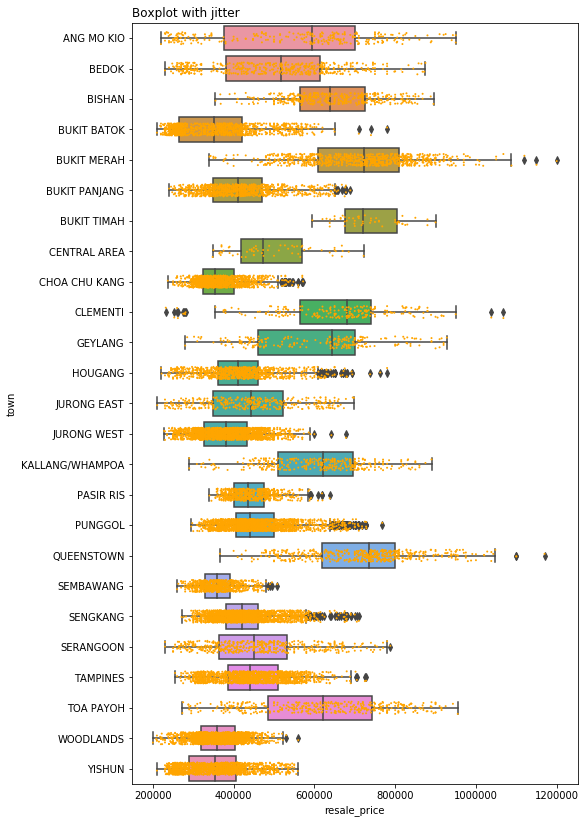

In [22]:
#df_priceplot.boxplot(by='town', column=['resale_price'], grid=False, vert=False, figsize=(6, 10))
plt.figure(figsize=(8,14))
ax = sns.boxplot(x='resale_price', y='town', data=df_priceplot)
ax = sns.stripplot(x='resale_price', y='town', data=df_priceplot, color="orange", jitter=0.2, size=2.0)
plt.title("Boxplot with jitter", loc="left")


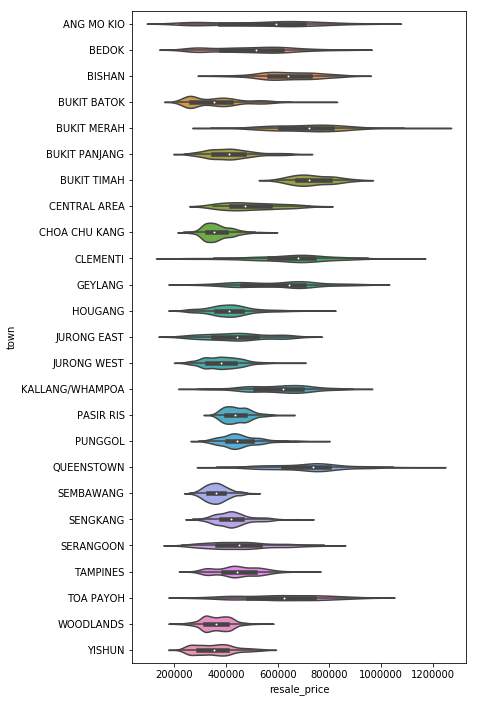

In [23]:
# The same can be visualized by a violin plot as well.
fig, ax = plt.subplots(figsize =(6, 12),) 
sns.violinplot(ax = ax, y = df_priceplot["town"],  
                  x = df_priceplot["resale_price"])

##### We have done the data cleansing.
The final step is to find the median value of flat resale price for every town sort the towns by the median value.

In [24]:
# First group the data by town
df_means = df_feature10.groupby('town')['resale_price'].median().astype(int).reset_index()
df_means.rename(columns={'town': 'Town', 'resale_price': 'Resale_Price'}, inplace= True)
df_mean=df_means.sort_values(by=['Resale_Price']).reset_index(drop=True)
df_mean.head()

,Town,Resale_Price
0,BUKIT BATOK,352000
1,YISHUN,355000
2,CHOA CHU KANG,355000
3,SEMBAWANG,360000
4,WOODLANDS,360000


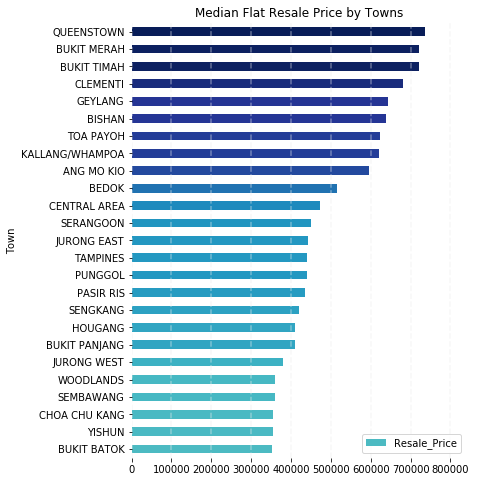

In [25]:
from matplotlib import cm
y=df_mean['Resale_Price']
colors = cm.YlGnBu(y / float(max(y)))
ax= df_mean.plot.barh(x='Town', y='Resale_Price', rot=0, figsize=(6, 8), color=colors )
plt.title('Median Flat Resale Price by Towns')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis=True, which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

#add vertical lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

### 2. Geo-Tagging the towns
In order to plot the town into a geographical map we need to append the coordinates to each town.  
For this project We consider the metro railway station(MRT), of each town as their center reference.  
The latitude and longitude for each town is extracted using Google API and saved as mrt_locdada.csv in Github.  
Lets have look at the data, then merge it with our masterdata file.

In [26]:
# Lets get the town coordinates
df_towncoord= pd.read_csv('https://raw.githubusercontent.com/abhi-divakaran/Coursera_Capstone/master/FINAL/mrt_locdata.csv')

# check only the header
df_towncoord.head(5)

,Town,Latitude,Longitude
0,ANG MO KIO,1.370025,103.849588
1,BEDOK,1.324043,103.930205
2,BISHAN,1.350920,103.848206
3,BUKIT BATOK,1.349069,103.749596
4,BUKIT PANJANG,1.378340,103.762452


In [27]:
#lets merge both df
df_hdb= df_means.merge(df_towncoord, how='inner', left_on=['Town'], right_on=['Town'])
df_hdb.head(5)

,Town,Resale_Price,Latitude,Longitude
0,ANG MO KIO,595000,1.370025,103.849588
1,BEDOK,516500,1.324043,103.930205
2,BISHAN,638000,1.350920,103.848206
3,BUKIT BATOK,352000,1.349069,103.749596
4,BUKIT PANJANG,410000,1.378340,103.762452


### 3. Explore and cluster the neighborhoods in Singapore  
Install geopy package

In [28]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [29]:
#first import necessary librarires
!pip -q install folium
import folium 
import requests
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim #converts an address to latitude longitude
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
address = 'Singapore, Singapore'
geolocator = Nominatim(user_agent= 'SG_explore')
location= geolocator.geocode(address)
latitude= location.latitude
longitude= location.longitude
print('Geo coordinates of Singapore are {}, {}.'.format(latitude, longitude))

Geo coordinates of Singapore are 1.340863, 103.830391822121.


##### Create a map of Singapore City-State with neighborhoods superimposed on top

In [31]:
#create map with latitude and longitude
map_SG = folium.Map(location=[latitude, longitude], zoom_start=12)

#add markers
for lat, lng, town in zip(df_hdb['Latitude'], df_hdb['Longitude'], df_hdb['Town']):
    label = '{}'.format(town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 10,
        popup=label,
        color= 'yellow',
        fill= True,
        fill_color= '3186cc',
        fill_opacity= 0.7,
        parse_html= False).add_to(map_SG)

map_SG

##### OK, time for Foursquare API to explore the neighborhood and do the segmenting.

In [32]:
CLIENT_ID= 'WEFVVVVMJITMPKN0JGOK0ZSUIXV4WXLFSBWTMY12OFMB4ON4'
CLIENT_SECRET= 'LTV2Z3HQ3QKWSN40J31NDBK51A05RYINW3XP2BNLXL3RTVQW'
VERSION= '20180605'
print('Forsquare Credentilas:\n', 'CLIENT ID: ' +CLIENT_ID, '\nCLIENT SECRET: ' +  CLIENT_SECRET)

Forsquare Credentilas:
 CLIENT ID: WEFVVVVMJITMPKN0JGOK0ZSUIXV4WXLFSBWTMY12OFMB4ON4 
CLIENT SECRET: LTV2Z3HQ3QKWSN40J31NDBK51A05RYINW3XP2BNLXL3RTVQW


### Lets begin exploration

The function **getNearbyVenues** extracts the following information for the dataframe it generates:  
Venue ID  
Venue Name  
Coordinates : Latitude and Longitude  
Category Name 

The function **getVenuesByCategory** performs the following:  
category based venue search to simulate user venue searches based on certain places of interest.  
This search extracts the following information:  
Venue ID  
Venue Name  
Coordinates : Latitude and Longitude  
Category Name  
For each retrieved venueID, retrive the venues category rating.  
The generated data frame in the second function contains the following column:  

In [33]:
town_latitude = df_hdb.loc[0, 'Latitude'] # neighborhood latitude value
town_longitude = df_hdb.loc[0, 'Longitude'] # neighborhood longitude value

town_name = df_hdb.loc[0, 'Town'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(town_name, 
                                                               town_latitude, 
                                                               town_longitude))

Latitude and longitude values of ANG MO KIO are 1.370025, 103.849588.


In [34]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    town_latitude, 
    town_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WEFVVVVMJITMPKN0JGOK0ZSUIXV4WXLFSBWTMY12OFMB4ON4&client_secret=LTV2Z3HQ3QKWSN40J31NDBK51A05RYINW3XP2BNLXL3RTVQW&v=20180605&ll=1.370025,103.849588&radius=1000&limit=100'

In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dcccf53211536001b497468'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ang Mo Kio',
  'headerFullLocation': 'Ang Mo Kio, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 89,
  'suggestedBounds': {'ne': {'lat': 1.3790250090000091,
    'lng': 103.85857377367182},
   'sw': {'lat': 1.361024990999991, 'lng': 103.84060222632817}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc30123abf495215220c393',
       'name': 'Old Chang Kee',
       'location': {'address': 'AMK Hub',
        'crossStreet': '53 Ang Mo Kio Avenue 3',
        'lat': 1.369093882325005,
        'lng': 103.84838865753792,
        'labeledLatLngs': 

In [36]:
# From the Foursquare lab in the previous module, we know that all the information is in the items key.
# Before we proceed, let's borrow the get_category_type function from the Foursquare lab
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Old Chang Kee,Snack Place,1.369094,103.848389
1,FairPrice Xtra,Supermarket,1.369279,103.848886
2,Subway,Sandwich Place,1.369136,103.847612
3,PLAYe,Hobby Shop,1.369109,103.848225
4,Face Ban Mian 非板面 (Ang Mo Kio),Noodle House,1.372031,103.847504


Lets check howmany venues were returned by FourSquare

In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

89 venues were returned by Foursquare.


#### Let's create a function to repeat the same process to all the neighborhoods in Singapore

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *SG_venues*.

In [40]:
SG_venues = getNearbyVenues(names=df_hdb['Town'],
                                   latitudes=df_hdb['Latitude'],
                                   longitudes=df_hdb['Longitude']
                                  )

ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


In [41]:
print (SG_venues.shape)
SG_venues.head()

(1716, 7)


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ANG MO KIO,1.370025,103.849588,Old Chang Kee,1.369094,103.848389,Snack Place
1,ANG MO KIO,1.370025,103.849588,FairPrice Xtra,1.369279,103.848886,Supermarket
2,ANG MO KIO,1.370025,103.849588,Subway,1.369136,103.847612,Sandwich Place
3,ANG MO KIO,1.370025,103.849588,PLAYe,1.369109,103.848225,Hobby Shop
4,ANG MO KIO,1.370025,103.849588,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House


Lets check how many venues were returned by each Town

In [42]:
SG_venues.groupby('Town').count()

,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Town,,,,,,
ANG MO KIO,89,89,89,89,89,89
BEDOK,99,99,99,99,99,99
BISHAN,72,72,72,72,72,72
BUKIT BATOK,42,42,42,42,42,42
BUKIT PANJANG,49,49,49,49,49,49
BUKIT TIMAH,69,69,69,69,69,69
CENTRAL AREA,100,100,100,100,100,100
CHOA CHU KANG,52,52,52,52,52,52
CLEMENTI,91,91,91,91,91,91


#### Let's find out how many unique categories can be curated from all the returned venues

In [43]:
print('There are {} uniques categories.'.format(len(SG_venues['Venue Category'].unique())))

There are 206 uniques categories.


## 3. Analyze Each Neighborhood

In [44]:
# one hot encoding
SG_onehot = pd.get_dummies(SG_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SG_onehot['Town'] = SG_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [SG_onehot.columns[-1]] + list(SG_onehot.columns[:-1])
SG_onehot = SG_onehot[fixed_columns]

SG_onehot.head()

,Town,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Garden,Betting Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Tennis Court,College Theater,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cycle Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,High School,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Music Store,Nightclub,Noodle House,Office,Optical Shop,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
#lets check the shape
SG_onehot.shape

(1716, 207)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
SG_grouped= SG_onehot.groupby('Town').mean().reset_index()
SG_grouped

,Town,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Garden,Betting Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Tennis Court,College Theater,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cycle Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,High School,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Music Store,Nightclub,Noodle House,Office,Optical Shop,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ANG MO KIO,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236,0.000000,0.011236,0.022472,0.011236,0.022472,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.022472,0.000000,0.000000,0.011236,0.000000,0.022472,0.022472,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.033708,0.000000,0.000000,0.000000,0.000000,0.00,0.078652,0.011236,0.000000,0.000000,0.000000,0.033708,0.000000,0.000000,0.000000,0.033708,0.000000,0.000000,0.000000,0.011236,0.000000,0.011236,0.000000,0.033708,0.000000,0.000000,0.011236,0.000000,0.168539,0.000000,0.000000,0.000000,0.011236,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236,0.011236,0.011236,0.000000,0.000000,0.000000,0.011236,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.033708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236,0.000000,0.00

In [47]:
#confirm the new shape
SG_grouped.shape

(24, 207)

#### Let's print each neighborhood along with the top 5 most common venues

In [48]:
num_top_venues = 5

for hood in SG_grouped['Town']:
    print("----"+hood+"----")
    temp = SG_grouped[SG_grouped['Town'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ANG MO KIO----
               venue  freq
0         Food Court  0.17
1        Coffee Shop  0.08
2        Supermarket  0.03
3  Convenience Store  0.03
4       Dessert Shop  0.03


----BEDOK----
                venue  freq
0         Coffee Shop  0.11
1  Chinese Restaurant  0.07
2          Food Court  0.06
3                Café  0.05
4    Asian Restaurant  0.04


----BISHAN----
                venue  freq
0          Food Court  0.08
1         Coffee Shop  0.08
2  Chinese Restaurant  0.07
3      Cosmetics Shop  0.06
4     Thai Restaurant  0.06


----BUKIT BATOK----
                  venue  freq
0            Food Court  0.19
1    Chinese Restaurant  0.10
2           Coffee Shop  0.10
3  Fast Food Restaurant  0.07
4         Grocery Store  0.07


----BUKIT PANJANG----
                  venue  freq
0           Bus Station  0.10
1  Fast Food Restaurant  0.06
2           Coffee Shop  0.06
3      Asian Restaurant  0.06
4                  Park  0.04


----BUKIT TIMAH----
                 venue

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Town_venues_sorted = pd.DataFrame(columns=columns)
Town_venues_sorted['Town'] = SG_grouped['Town']

for ind in np.arange(SG_grouped.shape[0]):
    Town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SG_grouped.iloc[ind, :], num_top_venues)

Town_venues_sorted.head()

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANG MO KIO,Food Court,Coffee Shop,Dessert Shop,Supermarket,Convenience Store,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Bar,Park
1,BEDOK,Coffee Shop,Chinese Restaurant,Food Court,Café,Supermarket,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Bakery,Japanese Restaurant
2,BISHAN,Coffee Shop,Food Court,Chinese Restaurant,Cosmetics Shop,Thai Restaurant,Ice Cream Shop,Seafood Restaurant,Bubble Tea Shop,Japanese Restaurant,Asian Restaurant
3,BUKIT BATOK,Food Court,Coffee Shop,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Malay Restaurant,Bus Station,Bus Stop,Frozen Yogurt Shop,Dim Sum Restaurant
4,BUKIT PANJANG,Bus Station,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Supermarket,Gym,Food Court,Noodle House,Park,Café


## 4. Cluster Neighborhoods

In [51]:
#Run *k*-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

SG_grouped_clustering = SG_grouped.drop('Town', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SG_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 0, 1, 3, 4, 2, 3, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [52]:
# add clustering labels
Town_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SG_merged = df_hdb

# merge SG_grouped with df_hdb to add latitude/longitude for each Town
SG_merged = SG_merged.join(Town_venues_sorted.set_index('Town'), on='Town')

SG_merged.head() # check the last columns!

,Town,Resale_Price,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANG MO KIO,595000,1.370025,103.849588,0,Food Court,Coffee Shop,Dessert Shop,Supermarket,Convenience Store,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Bar,Park
1,BEDOK,516500,1.324043,103.930205,3,Coffee Shop,Chinese Restaurant,Food Court,Café,Supermarket,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Bakery,Japanese Restaurant
2,BISHAN,638000,1.350920,103.848206,3,Coffee Shop,Food Court,Chinese Restaurant,Cosmetics Shop,Thai Restaurant,Ice Cream Shop,Seafood Restaurant,Bubble Tea Shop,Japanese Restaurant,Asian Restaurant
3,BUKIT BATOK,352000,1.349069,103.749596,0,Food Court,Coffee Shop,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Malay Restaurant,Bus Station,Bus Stop,Frozen Yogurt Shop,Dim Sum Restaurant
4,BUKIT PANJANG,410000,1.378340,103.762452,1,Bus Station,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Supermarket,Gym,Food Court,Noodle House,Park,Café


### Now Visualize the Clusters

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SG_merged['Latitude'], SG_merged['Longitude'], SG_merged['Town'], SG_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [54]:
SG_merged.loc[SG_merged['Cluster Labels'] == 0, SG_merged.columns[[0] + list(range(5, SG_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANG MO KIO,Food Court,Coffee Shop,Dessert Shop,Supermarket,Convenience Store,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Bar,Park
3,BUKIT BATOK,Food Court,Coffee Shop,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Malay Restaurant,Bus Station,Bus Stop,Frozen Yogurt Shop,Dim Sum Restaurant
18,SENGKANG,Food Court,Fast Food Restaurant,Coffee Shop,Bus Line,Bus Station,Shopping Mall,Bakery,Basketball Court,Indonesian Restaurant,Metro Station
22,WOODLANDS,Food Court,Café,Fast Food Restaurant,Coffee Shop,Japanese Restaurant,Shopping Mall,Pizza Place,Clothing Store,Supermarket,Malay Restaurant


### Cluster 2

In [55]:
SG_merged.loc[SG_merged['Cluster Labels'] == 1, SG_merged.columns[[0] + list(range(5, SG_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,BUKIT PANJANG,Bus Station,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Supermarket,Gym,Food Court,Noodle House,Park,Café
12,JURONG WEST,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Food Court,Dessert Shop,Café,Sandwich Place,Smoke Shop
15,PUNGGOL,Bubble Tea Shop,Asian Restaurant,Fast Food Restaurant,Café,Steakhouse,Supermarket,Food Court,Chinese Restaurant,Yoga Studio,Discount Store
17,SEMBAWANG,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Asian Restaurant,Café,Supermarket,Discount Store,Clothing Store,Pizza Place,Food & Drink Shop


### Cluster 3

In [56]:
SG_merged.loc[SG_merged['Cluster Labels'] == 2, SG_merged.columns[[0] + list(range(5, SG_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,CHOA CHU KANG,Fast Food Restaurant,Coffee Shop,Asian Restaurant,Golf Course,Bowling Alley,Food Court,Supermarket,Gym,Café,Market
10,HOUGANG,Coffee Shop,Food Court,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Café,Noodle House,Supermarket,Vegetarian / Vegan Restaurant,Spa
14,PASIR RIS,Fast Food Restaurant,Coffee Shop,Food Court,Sandwich Place,Park,Italian Restaurant,Supermarket,Thai Restaurant,Snack Place,Karaoke Bar
23,YISHUN,Coffee Shop,Fast Food Restaurant,Food Court,Asian Restaurant,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Fried Chicken Joint,Café,Noodle House


### Cluster 4

In [57]:
SG_merged.loc[SG_merged['Cluster Labels'] == 3, SG_merged.columns[[0] + list(range(5, SG_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,BEDOK,Coffee Shop,Chinese Restaurant,Food Court,Café,Supermarket,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Bakery,Japanese Restaurant
2,BISHAN,Coffee Shop,Food Court,Chinese Restaurant,Cosmetics Shop,Thai Restaurant,Ice Cream Shop,Seafood Restaurant,Bubble Tea Shop,Japanese Restaurant,Asian Restaurant
5,BUKIT TIMAH,Seafood Restaurant,Indian Restaurant,Japanese Restaurant,Bakery,Coffee Shop,Italian Restaurant,Food Court,Bus Station,BBQ Joint,Café
8,CLEMENTI,Food Court,Chinese Restaurant,Asian Restaurant,Coffee Shop,Indian Restaurant,Dessert Shop,Fast Food Restaurant,Steakhouse,Supermarket,Gym
9,GEYLANG,Chinese Restaurant,Food Court,Coffee Shop,Noodle House,Dim Sum Restaurant,Bakery,Cafeteria,Asian Restaurant,Soup Place,Indian Restaurant
11,JURONG EAST,Food Court,Chinese Restaurant,Japanese Restaurant,Coffee Shop,Café,Shopping Mall,Bubble Tea Shop,Bakery,Playground,Shoe Store
13,KALLANG/WHAMPOA,Chinese Restaurant,BBQ Joint,Thai Restaurant,Supermarket,Hotel,Dessert Shop,Dim Sum Restaurant,Coffee Shop,Hostel,Indian Restaurant
16,QUEENSTOWN,Chinese Restaurant,Coffee Shop,Food Court,Café,Noodle House,Shopping Mall,Spa,Supermarket,Indian Restaurant,Miscellaneous Shop
19,SERANGOON,Bus Station,Chinese Restaurant,Asian Restaurant,Dessert Shop,Café,Coffee Shop,Bar,Park,Noodle House,Japanese Restaurant
20,TAMPINES,Coffee Shop,Café,Bakery,Supermarket,Bubble Tea Shop,Pharmacy,Food Court,Gym,Chinese Restaurant,Indian Restaurant


### Cluster 5

In [58]:
SG_merged.loc[SG_merged['Cluster Labels'] == 4, SG_merged.columns[[0] + list(range(5, SG_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,CENTRAL AREA,Boutique,Hotel,Sushi Restaurant,Shopping Mall,Japanese Restaurant,Bubble Tea Shop,Chinese Restaurant,Bakery,Coffee Shop,Asian Restaurant


# ----end of Notebook----